In [3]:
import sys
sys.path.append('..\\helpers')

import numpy as np
import skimage.segmentation as seg
import skimage.color as color
import skimage.io as io
import cv2
import os
import math
from morphological_sifter import MorphologicalSifter
from display import plot_figures, read_img

from skimage.segmentation import slic, felzenszwalb
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt


mms = MorphologicalSifter()

# To allow auto reload to this notebook after modifying any external file imported
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


numRegions 1


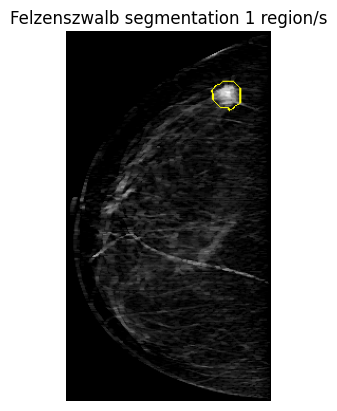

In [23]:
# MMs
image_input_name = '20587612_f4b2d377f43ba0bd_MG_R_CC_ANON.tif'
# image_input_name = '22670278_98429c0bdf78c0c7_MG_R_CC_ANON.tif'
# image_input_name = '22613822_45c7f44839fd9e68_MG_R_ML_ANON.tif'

normalized_image, enhanced_images, LSE_magnitudes = mms.fit(
    image_input_name, 
    plot=False,
)

# felzenszwalb segmentation
image = normalized_image.copy()

img_thresh = image.astype(float)
img_thresh_old = img_thresh
img_thresh = img_thresh/65535

segments = felzenszwalb(img_thresh, scale=3689, min_size=15,sigma=3)

numRegions = segments.max()
print("numRegions", numRegions)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(image, segments))
ax.set_title(f"Felzenszwalb segmentation {numRegions} region/s")
ax.set_axis_off()